
Model Evaluation:
Accuracy: 0.7402597402597403

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.62      0.71      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.74      0.74       154



/tmp/ipykernel_1981/4023734525.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
/tmp/ipykernel_1981/4023734525.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

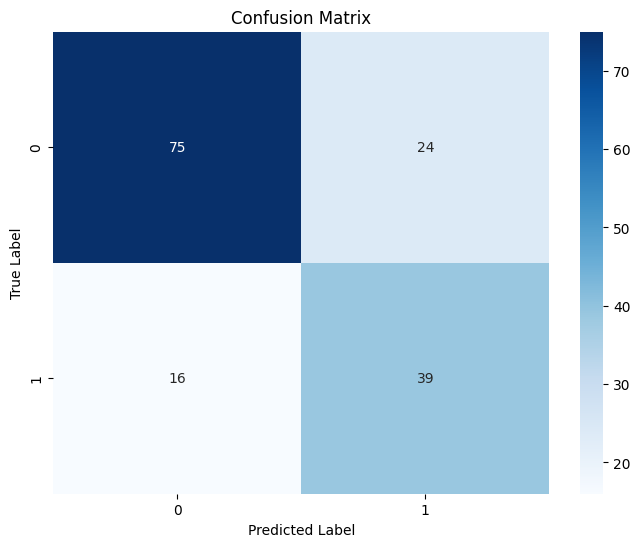

In [ ]:
import numpy as np 
import pandas as pd 	
import matplotlib.pyplot as plt 
import math


def accuracy_score(y_true, y_pred):

	"""	score = (y_true - y_pred) / len(y_true) """

	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)

def pre_processing(df):

	""" partioning data into features and target """

	X = df.drop([df.columns[-1]], axis = 1)
	y = df[df.columns[-1]]

	return X, y



class  NaiveBayes:

	"""
		Bayes Theorem:
										Likelihood * Class prior probability
				Posterior Probability = -------------------------------------
											Predictor prior probability
				
							  			 P(x|c) * p(c)
							   P(c|x) = ------------------ 
											  P(x)
	"""

	def __init__(self):

		"""
			Attributes:
				likelihoods: Likelihood of each feature per class
				class_priors: Prior probabilities of classes 
				pred_priors: Prior probabilities of features 
				features: All features of dataset
		"""
		self.features = list
		self.likelihoods = {}
		self.class_priors = {}
		self.pred_priors = {}

		self.X_train = np.array
		self.y_train = np.array
		self.train_size = int
		self.num_feats = int

	def fit(self, X, y):

		self.features = list(X.columns)
		self.X_train = X
		self.y_train = y
		self.train_size = X.shape[0]
		self.num_feats = X.shape[1]

		for feature in self.features:
			self.likelihoods[feature] = {}
			self.pred_priors[feature] = {}

			for feat_val in np.unique(self.X_train[feature]):
				self.pred_priors[feature].update({feat_val: 0})

				for outcome in np.unique(self.y_train):
					self.likelihoods[feature].update({feat_val+'_'+outcome:0})
					self.class_priors.update({outcome: 0})

		self._calc_class_prior()
		self._calc_likelihoods()
		self._calc_predictor_prior()

	def _calc_class_prior(self):

		""" P(c) - Prior Class Probability """

		for outcome in np.unique(self.y_train):
			outcome_count = sum(self.y_train == outcome)
			self.class_priors[outcome] = outcome_count / self.train_size

	def _calc_likelihoods(self):

		""" P(x|c) - Likelihood """

		for feature in self.features:

			for outcome in np.unique(self.y_train):
				outcome_count = sum(self.y_train == outcome)
				feat_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()

				for feat_val, count in feat_likelihood.items():
					self.likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count


	def _calc_predictor_prior(self):

		""" P(x) - Evidence """

		for feature in self.features:
			feat_vals = self.X_train[feature].value_counts().to_dict()

			for feat_val, count in feat_vals.items():
				self.pred_priors[feature][feat_val] = count/self.train_size


	def predict(self, X):

		""" Calculates Posterior probability P(c|x) """

		results = []
		X = np.array(X)

		for query in X:
			probs_outcome = {}
			for outcome in np.unique(self.y_train):
				prior = self.class_priors[outcome]
				likelihood = 1
				evidence = 1

				for feat, feat_val in zip(self.features, query):
					likelihood *= self.likelihoods[feat][feat_val + '_' + outcome]
					evidence *= self.pred_priors[feat][feat_val]

				posterior = (likelihood * prior) / (evidence)

				probs_outcome[outcome] = posterior

			result = max(probs_outcome, key = lambda x: probs_outcome[x])
			results.append(result)

		return np.array(results)

			

if __name__ == "__main__":

	#Weather Dataset
	print("\nWeather Dataset:")

	df = pd.read_table("../Data/weather.txt")
	#print(df)

	#Split fearures and target
	X,y  = pre_processing(df)

	nb_clf = NaiveBayes()
	nb_clf.fit(X, y)

	print("Train Accuracy: {}".format(accuracy_score(y, nb_clf.predict(X))))
	
	#Query 1:
	query = np.array([['Rainy','Mild', 'Normal', 't']])
	print("Query 1:- {} ---> {}".format(query, nb_clf.predict(query)))

	#Query 2:
	query = np.array([['Overcast','Cool', 'Normal', 't']])
	print("Query 2:- {} ---> {}".format(query, nb_clf.predict(query)))

	#Query 3:
	query = np.array([['Sunny','Hot', 'High', 't']])
	print("Query 3:- {} ---> {}".format(query, nb_clf.predict(query)))

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def load_weather_data():
    """Load the weather-play dataset"""
    data = pd.DataFrame([
        ['Rainy', 'Hot', 'High', 'f', 'no'],
        ['Rainy', 'Hot', 'High', 't', 'no'],
        ['Overcast', 'Hot', 'High', 'f', 'yes'],
        ['Sunny', 'Mild', 'High', 'f', 'yes'],
        ['Sunny', 'Cool', 'Normal', 'f', 'yes'],
        ['Sunny', 'Cool', 'Normal', 't', 'no'],
        ['Overcast', 'Cool', 'Normal', 't', 'yes'],
        ['Rainy', 'Mild', 'High', 'f', 'no'],
        ['Rainy', 'Cool', 'Normal', 'f', 'yes'],
        ['Sunny', 'Mild', 'Normal', 'f', 'yes'],
        ['Rainy', 'Mild', 'Normal', 't', 'yes'],
        ['Overcast', 'Mild', 'High', 't', 'yes'],
        ['Overcast', 'Hot', 'Normal', 'f', 'yes'],
        ['Sunny', 'Mild', 'High', 't', 'no']
    ], columns=['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'])
    return data

class WeatherNaiveBayes:
    def __init__(self):
        self.class_prob = {}      # P(Play)
        self.feature_prob = {}    # P(Feature|Play)
        
    def calculate_probabilities(self, data):
        """Calculate all probabilities needed for prediction"""
        # Calculate P(Play = yes) and P(Play = no)
        total_instances = len(data)
        play_counts = data['Play'].value_counts()
        self.class_prob = {cls: count/total_instances for cls, count in play_counts.items()}
        
        # Calculate conditional probabilities for each feature given the class
        features = ['Outlook', 'Temp', 'Humidity', 'Windy']
        for feature in features:
            self.feature_prob[feature] = {}
            # For each possible class (yes/no)
            for play_class in ['yes', 'no']:
                class_data = data[data['Play'] == play_class]
                class_count = len(class_data)
                
                # Count frequency of each feature value for this class
                value_counts = class_data[feature].value_counts()
                for value, count in value_counts.items():
                    # P(Feature=value|Play=class)
                    self.feature_prob[feature][f"{value}|{play_class}"] = count/class_count
    
    def predict(self, outlook, temp, humidity, windy):
        """Predict whether to play or not given the weather conditions"""
        probabilities = {}
        
        # Calculate probability for each class (yes/no)
        for play_class in ['yes', 'no']:
            # Start with P(Play)
            prob = self.class_prob[play_class]
            
            # Multiply by conditional probabilities
            # P(Outlook|Play) * P(Temp|Play) * P(Humidity|Play) * P(Windy|Play)
            features = {
                'Outlook': outlook,
                'Temp': temp,
                'Humidity': humidity,
                'Windy': windy
            }
            
            for feature, value in features.items():
                key = f"{value}|{play_class}"
                if key in self.feature_prob[feature]:
                    prob *= self.feature_prob[feature][key]
                else:
                    # Laplace smoothing for unseen values
                    prob *= 0.01
            
            probabilities[play_class] = prob
        
        # Return class with highest probability
        return max(probabilities, key=probabilities.get)

def calculate_accuracy(model, data):
    """Calculate the accuracy of the model"""
    # Split data into features and target
    X = data[['Outlook', 'Temp', 'Humidity', 'Windy']]
    y = data['Play']
    
    # Predict for all instances
    predictions = []
    for _, row in X.iterrows():
        prediction = model.predict(row['Outlook'], row['Temp'], row['Humidity'], row['Windy'])
        predictions.append(prediction)
    
    # Calculate accuracy
    correct = sum([pred == true for pred, true in zip(predictions, y)])
    accuracy = correct / len(y)
    return accuracy

def main():
    # Load data
    data = load_weather_data()
    
    # Create and train model
    model = WeatherNaiveBayes()
    model.calculate_probabilities(data)
    
    # Calculate accuracy
    accuracy = calculate_accuracy(model, data)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

if __name__ == "__main__":
    main()


Model Accuracy: 92.86%


/tmp/ipykernel_1981/421443681.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Play', data=data, palette='Set2')


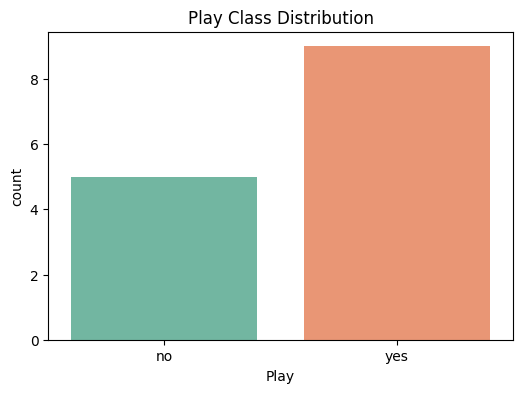

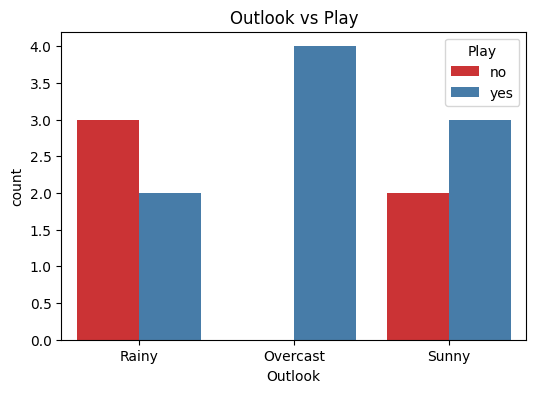

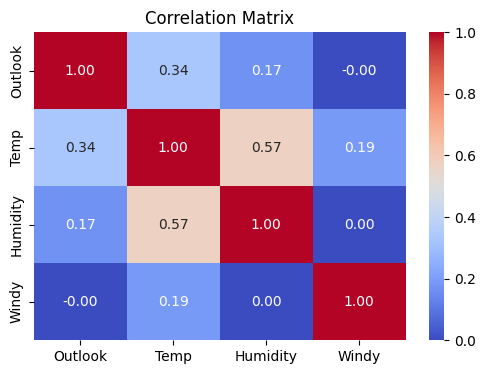

Model Accuracy: 92.86%


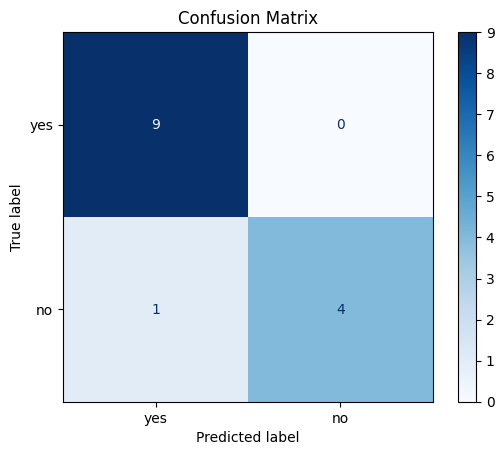

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def load_weather_data():
    """Load the weather-play dataset"""
    data = pd.DataFrame([
        ['Rainy', 'Hot', 'High', 'f', 'no'],
        ['Rainy', 'Hot', 'High', 't', 'no'],
        ['Overcast', 'Hot', 'High', 'f', 'yes'],
        ['Sunny', 'Mild', 'High', 'f', 'yes'],
        ['Sunny', 'Cool', 'Normal', 'f', 'yes'],
        ['Sunny', 'Cool', 'Normal', 't', 'no'],
        ['Overcast', 'Cool', 'Normal', 't', 'yes'],
        ['Rainy', 'Mild', 'High', 'f', 'no'],
        ['Rainy', 'Cool', 'Normal', 'f', 'yes'],
        ['Sunny', 'Mild', 'Normal', 'f', 'yes'],
        ['Rainy', 'Mild', 'Normal', 't', 'yes'],
        ['Overcast', 'Mild', 'High', 't', 'yes'],
        ['Overcast', 'Hot', 'Normal', 'f', 'yes'],
        ['Sunny', 'Mild', 'High', 't', 'no']
    ], columns=['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'])
    return data

class WeatherNaiveBayes:
    def __init__(self):
        self.class_prob = {}      # P(Play)
        self.feature_prob = {}    # P(Feature|Play)
        
    def calculate_probabilities(self, data):
        """Calculate all probabilities needed for prediction"""
        # Calculate P(Play = yes) and P(Play = no)
        total_instances = len(data)
        play_counts = data['Play'].value_counts()
        self.class_prob = {cls: count/total_instances for cls, count in play_counts.items()}
        
        # Calculate conditional probabilities for each feature given the class
        features = ['Outlook', 'Temp', 'Humidity', 'Windy']
        for feature in features:
            self.feature_prob[feature] = {}
            # For each possible class (yes/no)
            for play_class in ['yes', 'no']:
                class_data = data[data['Play'] == play_class]
                class_count = len(class_data)
                
                # Count frequency of each feature value for this class
                value_counts = class_data[feature].value_counts()
                for value, count in value_counts.items():
                    # P(Feature=value|Play=class)
                    self.feature_prob[feature][f"{value}|{play_class}"] = count/class_count
    
    def predict(self, outlook, temp, humidity, windy):
        """Predict whether to play or not given the weather conditions"""
        probabilities = {}
        
        # Calculate probability for each class (yes/no)
        for play_class in ['yes', 'no']:
            # Start with P(Play)
            prob = self.class_prob[play_class]
            
            # Multiply by conditional probabilities
            # P(Outlook|Play) * P(Temp|Play) * P(Humidity|Play) * P(Windy|Play)
            features = {
                'Outlook': outlook,
                'Temp': temp,
                'Humidity': humidity,
                'Windy': windy
            }
            
            for feature, value in features.items():
                key = f"{value}|{play_class}"
                if key in self.feature_prob[feature]:
                    prob *= self.feature_prob[feature][key]
                else:
                    # Laplace smoothing for unseen values
                    prob *= 0.01
            
            probabilities[play_class] = prob
        
        # Return class with highest probability
        return max(probabilities, key=probabilities.get)

def calculate_accuracy(model, data):
    """Calculate the accuracy of the model"""
    # Split data into features and target
    X = data[['Outlook', 'Temp', 'Humidity', 'Windy']]
    y = data['Play']
    
    # Predict for all instances
    predictions = []
    for _, row in X.iterrows():
        prediction = model.predict(row['Outlook'], row['Temp'], row['Humidity'], row['Windy'])
        predictions.append(prediction)
    
    # Calculate accuracy
    correct = sum([pred == true for pred, true in zip(predictions, y)])
    accuracy = correct / len(y)
    return accuracy, predictions, y

def plot_data_visualizations(data):
    """Plot data visualizations"""
    
    # 1. Class Distribution (Play: Yes/No)
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Play', data=data, palette='Set2')
    plt.title('Play Class Distribution')
    plt.show()
    
    # 2. Feature Distribution for 'Outlook'
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Outlook', hue='Play', data=data, palette='Set1')
    plt.title('Outlook vs Play')
    plt.show()
    
    # 3. Heatmap for Correlation (Numerical Features)
    data_encoded = data.copy()
    for column in ['Outlook', 'Temp', 'Humidity', 'Windy']:
        data_encoded[column] = pd.factorize(data[column])[0]
    
    plt.figure(figsize=(6, 4))
    correlation_matrix = data_encoded[['Outlook', 'Temp', 'Humidity', 'Windy']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

def plot_confusion_matrix(predictions, true_labels):
    """Plot confusion matrix"""
    cm = confusion_matrix(true_labels, predictions, labels=['yes', 'no'])
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])
    cm_display.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

def main():
    # Load data
    data = load_weather_data()
    
    # Plot initial visualizations
    plot_data_visualizations(data)
    
    # Create and train model
    model = WeatherNaiveBayes()
    model.calculate_probabilities(data)
    
    # Calculate accuracy and get predictions
    accuracy, predictions, true_labels = calculate_accuracy(model, data)
    
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    # Plot confusion matrix
    plot_confusion_matrix(predictions, true_labels)

if __name__ == "__main__":
    main()


/tmp/ipykernel_1877/1940444165.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Play', data=data, palette='Set2')


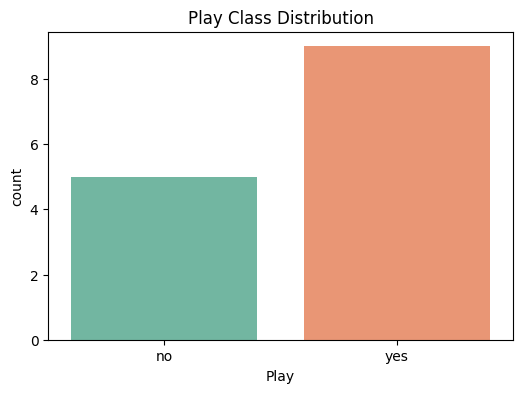

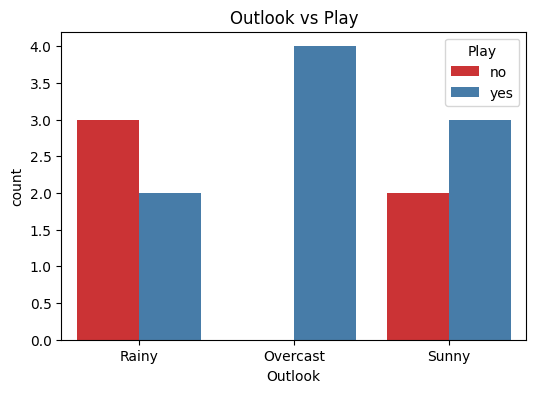

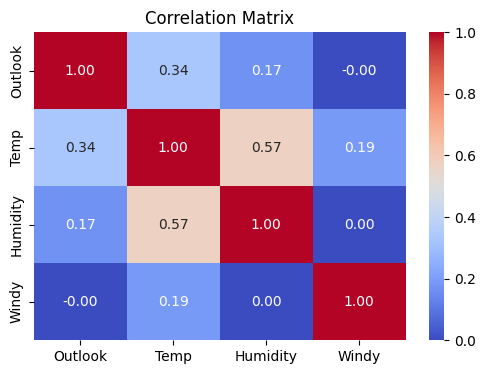

Play
yes    9
no     5
Name: count, dtype: int64
Class Probabilities (P(Play)):
P(Play = yes): 0.6429
P(Play = no): 0.3571


P(Outlook = Overcast|Play = yes): 0.4444
P(Outlook = Sunny|Play = yes): 0.3333
P(Outlook = Rainy|Play = yes): 0.2222
P(Outlook = Rainy|Play = no): 0.6000
P(Outlook = Sunny|Play = no): 0.4000
P(Temp = Mild|Play = yes): 0.4444
P(Temp = Cool|Play = yes): 0.3333
P(Temp = Hot|Play = yes): 0.2222
P(Temp = Hot|Play = no): 0.4000
P(Temp = Mild|Play = no): 0.4000
P(Temp = Cool|Play = no): 0.2000
P(Humidity = Normal|Play = yes): 0.6667
P(Humidity = High|Play = yes): 0.3333
P(Humidity = High|Play = no): 0.8000
P(Humidity = Normal|Play = no): 0.2000
P(Windy = f|Play = yes): 0.6667
P(Windy = t|Play = yes): 0.3333
P(Windy = t|Play = no): 0.6000
P(Windy = f|Play = no): 0.4000


Calculating for P(Play = yes):
  P(Outlook = Rainy|Play = yes): 0.2222 -> P(Play = yes) * P(Outlook = Rainy|Play = yes) = 0.1429
  P(Temp = Hot|Play = yes): 0.2222 -> P(Play = yes) * P(Temp = Hot|Play = 

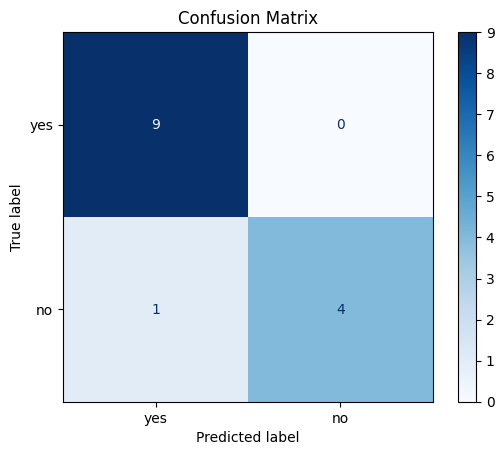

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def load_weather_data():
    """Load the weather-play dataset"""
    data = pd.DataFrame([
        ['Rainy', 'Hot', 'High', 'f', 'no'],
        ['Rainy', 'Hot', 'High', 't', 'no'],
        ['Overcast', 'Hot', 'High', 'f', 'yes'],
        ['Sunny', 'Mild', 'High', 'f', 'yes'],
        ['Sunny', 'Cool', 'Normal', 'f', 'yes'],
        ['Sunny', 'Cool', 'Normal', 't', 'no'],
        ['Overcast', 'Cool', 'Normal', 't', 'yes'],
        ['Rainy', 'Mild', 'High', 'f', 'no'],
        ['Rainy', 'Cool', 'Normal', 'f', 'yes'],
        ['Sunny', 'Mild', 'Normal', 'f', 'yes'],
        ['Rainy', 'Mild', 'Normal', 't', 'yes'],
        ['Overcast', 'Mild', 'High', 't', 'yes'],
        ['Overcast', 'Hot', 'Normal', 'f', 'yes'],
        ['Sunny', 'Mild', 'High', 't', 'no']
    ], columns=['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'])
    return data

class WeatherNaiveBayes:
    def __init__(self):
        self.class_prob = {}      # P(Play)
        self.feature_prob = {}    # P(Feature|Play)
        
    def calculate_probabilities(self, data):
        """Calculate all probabilities needed for prediction"""
        # Calculate P(Play = yes) and P(Play = no)
        total_instances = len(data)
        play_counts = data['Play'].value_counts()
        print(play_counts)
        self.class_prob = {cls: count/total_instances for cls, count in play_counts.items()}
        
        # Print Step: Class Probabilities (P(Play))
        print("Class Probabilities (P(Play)):")
        for cls, prob in self.class_prob.items():
            print(f"P(Play = {cls}): {prob:.4f}")
        print("\n")
        
        # Calculate conditional probabilities for each feature given the class
        features = ['Outlook', 'Temp', 'Humidity', 'Windy']
        for feature in features:
            # For each possible class (yes/no)
            for play_class in ['yes', 'no']:
                class_data = data[data['Play'] == play_class]
                class_count = len(class_data)
                
                # Count frequency of each feature value for this class
                value_counts = class_data[feature].value_counts()
                
                for value, count in value_counts.items():
                    # P(Feature=value|Play=class)
                    
                    prob = count/class_count
                    # self.feature_prob.setdefault(feature, {})[f"{value}|{play_class}"] = prob
                    if feature not in self.feature_prob:
                        self.feature_prob[feature] = {}
                    self.feature_prob[feature][f"{value}|{play_class}"] = prob
                    
                    # Print Step: Conditional Probabilities (P(Feature|Play))
                    print(f"P({feature} = {value}|Play = {play_class}): {prob:.4f}")
        
        print("\n")

    def predict(self, outlook, temp, humidity, windy):
        """Predict whether to play or not given the weather conditions"""
        probabilities = {}
        
        # Calculate probability for each class (yes/no)
        for play_class in ['yes', 'no']:
            # Start with P(Play)
            prob = self.class_prob[play_class]
            
            # Multiply by conditional probabilities
            # P(Outlook|Play) * P(Temp|Play) * P(Humidity|Play) * P(Windy|Play)
            features = {
                'Outlook': outlook,
                'Temp': temp,
                'Humidity': humidity,
                'Windy': windy
            }
            
            print(f"Calculating for P(Play = {play_class}):")
            for feature, value in features.items():
                key = f"{value}|{play_class}"
                if key in  self.feature_prob[feature]:
                    feature_prob= self.feature_prob[feature][key]
                else:
                    # Laplace smoothing for unseen values
                    feature_prob = 0.01
                
                prob *= feature_prob
                print(f"  P({feature} = {value}|Play = {play_class}): {feature_prob:.4f} -> P(Play = {play_class}) * P({feature} = {value}|Play = {play_class}) = {prob:.4f}")
            
            probabilities[play_class] = prob
        print("\n")
        
        # Return class with highest probability
        return max(probabilities, key=probabilities.get)

def calculate_accuracy(model, data):
    """Calculate the accuracy of the model"""
    # Split data into features and target
    X = data[['Outlook', 'Temp', 'Humidity', 'Windy']]
    y = data['Play']
    
    # Predict for all instances
    predictions = []
    for _, row in X.iterrows():
        prediction = model.predict(row['Outlook'], row['Temp'], row['Humidity'], row['Windy'])
        predictions.append(prediction)
    
    # Calculate accuracy
    correct = sum([pred == true for pred, true in zip(predictions, y)])
    accuracy = correct / len(y)
    
    # Print Step: Accuracy Calculation
    print(f"Accuracy Calculation:")
    print(f"Correct Predictions: {correct}/{len(y)}")
    print(f"Accuracy: {accuracy * 100:.2f}%\n")
    
    return accuracy, predictions, y

def plot_data_visualizations(data):
    """Plot data visualizations"""
    
    # 1. Class Distribution (Play: Yes/No)
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Play', data=data, palette='Set2')
    plt.title('Play Class Distribution')
    plt.show()
    
    # 2. Feature Distribution for 'Outlook'
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Outlook', hue='Play', data=data, palette='Set1')
    plt.title('Outlook vs Play')
    plt.show()
    
    # 3. Heatmap for Correlation (Numerical Features)
    data_encoded = data.copy()
    for column in ['Outlook', 'Temp', 'Humidity', 'Windy']:
        data_encoded[column] = pd.factorize(data[column])[0]
    
    plt.figure(figsize=(6, 4))
    correlation_matrix = data_encoded[['Outlook', 'Temp', 'Humidity', 'Windy']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

def plot_confusion_matrix(predictions, true_labels):
    """Plot confusion matrix"""
    cm = confusion_matrix(true_labels, predictions, labels=['yes', 'no'])
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no'])
    cm_display.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

def main():
    # Load data
    data = load_weather_data()
    
    # Plot initial visualizations
    plot_data_visualizations(data)
    
    # Create and train model
    model = WeatherNaiveBayes()
    model.calculate_probabilities(data)
    
    # Calculate accuracy and get predictions
    accuracy, predictions, true_labels = calculate_accuracy(model, data)
    
    # Print model accuracy
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    # Plot confusion matrix
    plot_confusion_matrix(predictions, true_labels)

if __name__ == "__main__":
    main()
